In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw = pd.read_csv('47-Tuc.csv', sep=';') # II/37/measures https://vizier.cds.unistra.fr/viz-bin/VizieR
raw

,ID,Vmag,B-V,U-B,n_Nobs,Nobs,ObsType,clID,yr,ref
0,47 TUC 1,14.57,0.74,0.0,,,2,1,61,APJ 133 430
1,47 TUC 2,13.77,0.80,0.0,,,2,1,61,APJ 133 430
2,47 TUC 3,11.77,1.50,0.0,,,2,1,61,APJ 133 430
3,47 TUC 4,14.25,0.78,0.0,,,2,1,61,APJ 133 430
4,47 TUC 5,13.91,0.69,0.0,,,2,1,61,APJ 133 430
...,...,...,...,...,...,...,...,...,...,...
9994,W CEN 3354,14.98,0.65,0.0,,,2,29,66,R.O.A. NO. 2
9995,W CEN 3368,15.32,0.65,0.0,,,2,29,66,R.O.A. NO. 2
9996,W CEN 3574,14.65,0.65,0.0,,,2,29,66,R.O.A. NO. 2
9997,W CEN 3586,15.75,0.65,0.0,,,2,29,66,R.O.A. NO. 2


In [4]:
data = raw[['B-V', 'Vmag', 'clID']].copy()
data = data[data['clID'] <= 7]
data = data.rename(columns={'Vmag': 'M_V'})
data = data[['B-V', 'M_V']].copy()
data

,B-V,M_V
0,0.74,14.57
1,0.80,13.77
2,1.50,11.77
3,0.78,14.25
4,0.69,13.91
...,...,...
2363,1.30,18.09
2364,0.77,17.17
2365,0.63,18.95
2366,1.19,18.66


In [5]:
R = 4450.0 # pc
R0 = 10.0 # pc
data.loc[:, 'M_V'] = data['M_V'].map(lambda x: x - 5.0 * np.log10(R / R0))
data

,B-V,M_V
0,0.74,1.3282
1,0.80,0.5282
2,1.50,-1.4718
3,0.78,1.0082
4,0.69,0.6682
...,...,...
2363,1.30,4.8482
2364,0.77,3.9282
2365,0.63,5.7082
2366,1.19,5.4182


In [6]:
data.to_csv('../../data/hr-47-Tuc.txt', sep='\t', index=False, float_format='%.4f')
!head ../../data/hr-47-Tuc.txt

B-V	M_V
0.7400	1.3282
0.8000	0.5282
1.5000	-1.4718
0.7800	1.0082
0.6900	0.6682
0.7500	0.7182
0.7800	1.0882
0.7300	0.5082
0.6700	0.5682


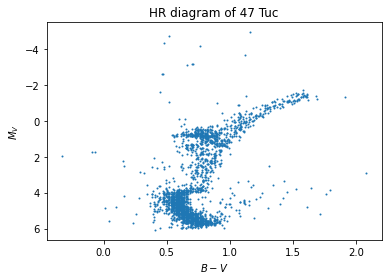

In [7]:
plt.scatter(data['B-V'], data['M_V'], s=1 )

plt.title('HR diagram of 47 Tuc')
plt.xlabel('$B-V$')
plt.ylabel('$M_V$')
plt.gca().invert_yaxis()

plt.show()